# Classifier metrics with paper parameters

In [38]:
import pickle

# Open the file in binary read mode
with open('logs/LASTbanksys.pkl', 'rb') as f:
    banksys = pickle.load(f)

print(banksys)

/home/daniele/PycharmProjects/RL_Attack_September24/.venv/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.7.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/daniele/PycharmProjects/RL_Attack_September24/.venv/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.7.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/daniele/PycharmProjects/RL_Attack_September24/.venv/lib/python3.13/site-packages/sklearn/base.py:442: 

In [40]:
from parameters import Parameters, CardSimParameters, ClassificationParameters
from banksys import Banksys
import polars as pl

#params = Parameters(cardsim=CardSimParameters.paper_params(), clf_params=ClassificationParameters.paper_params(True))

#banksys = params.create_env().system
#banksys = Banksys.load("cache/banksys/10000-payers/365-days/start-2023-01-01")
print(banksys.current_time)
#banksys = params.create_banksys()

2023-06-30 00:01:47


In [41]:
from datetime import timedelta

end_time = banksys.current_time + timedelta(days=30)
transactions = banksys._transactions_df.filter(pl.col("timestamp").is_between(banksys.current_time, end_time))
test_y = transactions["is_fraud"]
dfs = banksys.simulate_until(end_time)
test_x = pl.concat(dfs)
test_x.describe()

statistic,hour,is_online,amount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,card_n_trx_last_1:00:00,card_mean_amount_last_1:00:00,"card_n_trx_last_1 day, 0:00:00","card_mean_amount_last_1 day, 0:00:00","card_n_trx_last_7 days, 0:00:00","card_mean_amount_last_7 days, 0:00:00","card_n_trx_last_30 days, 0:00:00","card_mean_amount_last_30 days, 0:00:00",terminal_n_trx_last_1:00:00,terminal_risk_last_1:00:00,"terminal_n_trx_last_1 day, 0:00:00","terminal_risk_last_1 day, 0:00:00","terminal_n_trx_last_7 days, 0:00:00","terminal_risk_last_7 days, 0:00:00","terminal_n_trx_last_30 days, 0:00:00","terminal_risk_last_30 days, 0:00:00"
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",519331.0,519331.0,519331.0,519331.0,519331.0,519331.0,519331.0,519331.0,519331.0,519331.0,519331.0,519331.0,519331.0,519331.0,519331.0,519331.0,519331.0,519331.0,519331.0,519331.0,519331.0,519331.0,519331.0,519331.0,519331.0,519331.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",12.198827,0.360693,21.033962,0.132954,0.132744,0.133075,0.133926,0.167502,0.165992,0.133807,0.06881,1.370531,0.906742,12.357711,6.325684,20.959656,27.109477,21.058536,0.692766,0.002228,9.054393,0.010068,63.349305,0.010946,271.360832,0.01485
"""std""",4.877246,0.480202,28.666264,0.339525,0.339298,0.339656,0.340573,0.373424,0.372074,0.340445,0.26561,9.070535,0.97288,22.177137,2.851764,15.524462,7.768181,11.095167,0.92734,0.04378,3.508775,0.039147,14.805675,0.014878,55.892529,0.008672
"""min""",0.0,0.0,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.779333,0.0,0.0,0.0,0.0,17.0,0.0,106.0,0.0
"""25%""",8.0,0.0,6.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,11.112,22.0,13.187241,0.0,0.0,7.0,0.0,52.0,0.0,228.0,0.008621
"""50%""",11.0,0.0,12.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.17,6.0,16.91875,26.0,18.3032,0.0,0.0,9.0,0.0,64.0,0.0,274.0,0.013825
"""75%""",17.0,1.0,24.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.175,8.0,26.11,32.0,26.006562,1.0,0.0,11.0,0.0,74.0,0.018182,317.0,0.02008
"""max""",23.0,1.0,1406.27,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1261.41,9.0,1181.89,25.0,607.95,86.0,126.041538,8.0,1.0,29.0,1.0,111.0,0.121212,409.0,0.059113


In [42]:
from sklearn.ensemble import IsolationForest
from imblearn.ensemble import BalancedRandomForestClassifier

In [43]:
classifier = banksys.clf


In [44]:
classifier.anomaly_detection_classifier = IsolationForest(n_jobs=-1,contamination=0.005)
classifier.anomaly_detection_classifier.fit(classifier.dataset['Transactions'])

classifier.ml_classifier = BalancedRandomForestClassifier(n_estimators=200, sampling_strategy=0.05, n_jobs=-1)
classifier.ml_classifier.fit(classifier.dataset['Transactions'], classifier.dataset['Labels'])



,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [45]:
banksys.attack_start

datetime.datetime(2023, 6, 30, 0, 1, 47)

F1 Score: 0.32697653371258645
Recall: 0.49500880798590724
Precision: 0.2441119691119691
Accuracy: 0.979953054988052
Confusion Matrix:
[[506391   7831]
 [  2580   2529]]


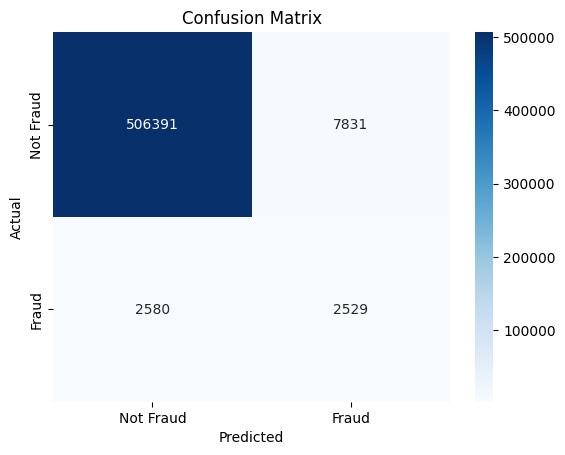

In [46]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
classifier.use_anomaly=True
predicted = banksys.clf.predict(test_x, true_labels=test_y, t=banksys.attack_start) #  classifier.current_time)

f1 = f1_score(test_y, predicted)
recall = recall_score(test_y, predicted)
precision = precision_score(test_y, predicted)
accuracy = accuracy_score(test_y, predicted)
confusion = confusion_matrix(test_y, predicted)
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)

sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

F1 Score: 0.3738969225064887
Recall: 0.4934429438246232
Precision: 0.3009789875835721
Accuracy: 0.9837425456982156
Confusion Matrix:
[[508367   5855]
 [  2588   2521]]


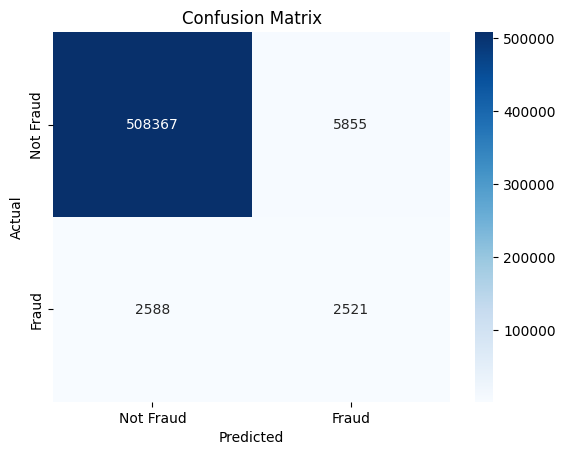

In [47]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
classifier.use_anomaly=False
predicted = banksys.clf.predict(test_x, true_labels=test_y, t=banksys.attack_start) #  classifier.current_time)

f1 = f1_score(test_y, predicted)
recall = recall_score(test_y, predicted)
precision = precision_score(test_y, predicted)
accuracy = accuracy_score(test_y, predicted)
confusion = confusion_matrix(test_y, predicted)
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)

sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [48]:
import numpy as np
from datetime import timedelta

test_duration = timedelta(days=30)

dfs = banksys.simulate_until(banksys.attack_start + test_duration)
test_x = pl.concat(dfs)
test_y = banksys.training_set["is_fraud"].to_numpy().astype(np.bool)


ValueError: cannot concat empty list

In [ ]:
test_x.describe()
len(test_y)

In [ ]:
test_x2 = test_x[-2609409:]
test_x2.describe()


In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predicted = banksys.clf.predict(test_x2, true_labels=test_y, t=banksys.attack_start)

f1 = f1_score(test_y, predicted)
recall = recall_score(test_y, predicted)
precision = precision_score(test_y, predicted)
accuracy = accuracy_score(test_y, predicted)
confusion = confusion_matrix(test_y, predicted)
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()